In [54]:
import cv2
import mediapipe as mp
from matplotlib import pyplot as plt
import numpy as np

In [55]:
# Importing Image
image=cv2.imread("anita.jpg")
image=cv2.resize(image,(600,600))
annoted_image=image.astype(np.uint8)

In [56]:
# Fetching Edge List
mp_face_mesh=mp.solutions.face_mesh
connection_tesselation=mp_face_mesh.FACEMESH_TESSELATION
# print(connection_tesselation)

In [57]:
# Fetching Land Marks ( Nodes )
with mp_face_mesh.FaceMesh(static_image_mode=False,max_num_faces=2,refine_landmarks=True,min_detection_confidence=0.5) as face_mesh:
    results=face_mesh.process(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
# print_face_mesh(results.multi_face_landmarks) 

In [58]:
# Making Seperate List For X-axis & Y-axis of Nodes
x_axis=np.empty(len(results.multi_face_landmarks[0].landmark))
y_axis=np.empty(len(results.multi_face_landmarks[0].landmark))
i=0

for nodes in results.multi_face_landmarks[0].landmark:
    x_axis[i]=(results.multi_face_landmarks[0].landmark[i].x)
    y_axis[i]=(results.multi_face_landmarks[0].landmark[i].y)
    i=i+1
print(len(results.multi_face_landmarks[0].landmark))
# for axis in range(0,len(x_axis)):
#     print(x_axis[axis],y_axis[axis],"\n")

478


In [59]:
# Generating Feature Matrix
FEATURE_MATRIX=np.zeros((468,468))
for i in range(468):
    FEATURE_MATRIX[i][i]=1

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.02159849]
 [0.         0.         0.         ... 0.         0.02159849 0.        ]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]]
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


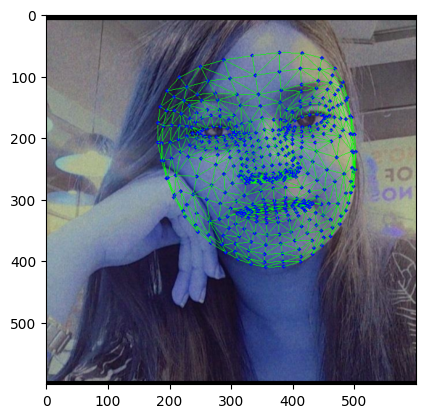

In [60]:
WEIGHTED_ADJACENCY_MATRIX=np.zeros((468,468)) #creating a numpy array of shape 468X468 initialized with zero
BINARY_ADJACENCY_MATRIX=np.zeros((468,468))

for edge in connection_tesselation:
    # Determining X & Y axis of Two Connected Points
    x1=x_axis[edge[0]]
    y1=y_axis[edge[0]]
    x2=x_axis[edge[1]]
    y2=y_axis[edge[1]]
    # Calculating Eucleadin Distance for Weighted Graph
    eucleadian_distance=(((x2-x1)**2 + (y2-y1)**2 ) ** 0.5)
    # Creating Weighted Graph
    WEIGHTED_ADJACENCY_MATRIX[edge[0]][edge[1]]=eucleadian_distance
    WEIGHTED_ADJACENCY_MATRIX[edge[1]][edge[0]]=eucleadian_distance

    BINARY_ADJACENCY_MATRIX[edge[0]][edge[1]]=1
    BINARY_ADJACENCY_MATRIX[edge[1]][edge[0]]=1
    # Normalizing axis Values For Visualizing Meash on Face
    shape = image.shape 
    relative_x = int(x1 * shape[1])
    relative_y = int(y1 * shape[0])
    relative_z = int(x2 * shape[1])   
    relative_c = int(y2 * shape[0])
    # Drawing Nodes and Edges on Image For Visualization
    cv2.circle(image, (relative_x, relative_y), radius=1, color=(0, 0, 255), thickness=3) 
    cv2.line(image,(relative_x,relative_y),(relative_z,relative_c),(0,255,0),1)

plt.imshow(image)
print(WEIGHTED_ADJACENCY_MATRIX)
print(BINARY_ADJACENCY_MATRIX)
print(FEATURE_MATRIX)
# np.savetxt("firstarray2.csv", WEIGHTED_ADJACENCY_MATRIX, delimiter=",")
